In [1]:
from pylab import*

## Ejercicio #2 
2 . Utilizando los integradores anteriores encuentre un paso que le asegure que la solución tenga por lo menos $4$ cifras significativas en el resultado de integración. La ecuación es la siguiente:

$$
y'''+{y''}^2- 3{y'}^3+\cos^2(y) = e^{-t}\sin(3t)
$$
Disclaimer: Por alguna razón no se renderiza el \dddot para la derivada, pero hay que tomar en cuenta que esta notación indica que la derivada es respecto al tiempo.\
Con condiciones iniciales $\ddot{y}(1) = 1,\,  \dot{y} = 2,\,  y(1) = 1  $. En particular que sucede en el intervalo $t\in[1,1.7]$, describa lo que sucede cuando $t \rightarrow 2$

Bueno, como ya habiamos hecho con la ED de segundo orden, lo que debemos hacer es una sustitución en nuestra ED de tercer orden y asi obtener 3 ecuaciones de primer orden.
Entonces sea 
$$
z_1 = y, \quad z_2 = \dot{y}, \quad z_3 = \ddot{y}
$$
Entonces, tenemos que 
$$
\dot z_1 = z_2, \quad \dot z_2 = z_3, \quad \dot z_3 = e^{-t}\sin(3t) - z_3^2 + 3z_2^3 - \cos^2(z_1) 
$$
Y nuestras nuevas condiciones inciales son:
$$
z_1(1) = 1, \quad z_2(1) = 2, \quad z_3(1) = 1
$$

### Euler

In [9]:
# Ahora podemos definir la siguiente función:
def f(t, z):
    z1, z2, z3 = z
    return array([z2,
                     z3,
                     exp(-t)*sin(3*t) - z3**2 + 3*z2**3 - cos(z1)**2])


z0 = array([1, 2, 1])

t = linspace(1, 1.7, 100000)


In [10]:
def eulerSystemSolver(z0, t):
    z = [z0]
    h = t[1] - t[0]
    for i in range(0, len(t)-1): 
        z0 = z0 + h * np.array(f(t[i], z0))
        z.append(z0)
    return np.array(z)

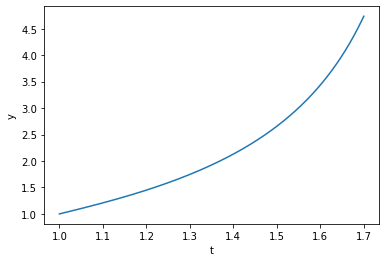

In [12]:

z = eulerSystemSolver(z0, t)
plot(t, z[:, 0])
xlabel('t')
ylabel('y')
show()

In [27]:
def rungeKutta2single(f, y0, t):
    y = [y0]
    h = t[1] - t[0]
    for i in range(0, len(t)-1):
        k1 = f(y0, t[i-1])
        k2 = f(y0 + h/2 * k1, t[i-1] + h/2)
        y0 = y0 + h * k2
        y.appendy(y0)
    return array(y)
def f(x, y):
    return (x -y**2)
x0 = 1
t =linspace(0, 0.1, 100)
x = rungeKutta2(f, x0, t)

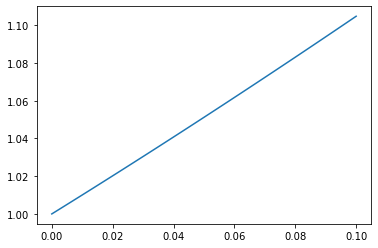

In [28]:
plot(   t, x, label='RK2')